# Notebook_2 - Logistic Growth



### Import needed packages

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

### Goals

Numerical solutions to the Logistic Growth Equation
$$\frac{dn}{dt} = r_c n(t) \left( 1- \frac{n(t)}{K} \right )$$
with the initial condition
$$n(0)=n_0 $$

Euler's method:
$$y_{n+1} = y_{n} + h f(x_n,y_n)$$
$$x_{n+1} = x_{n} + h$$

Vector Fields

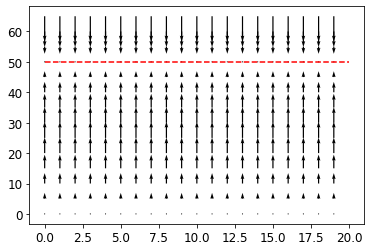

In [6]:
# PARAMETERS AND INITIAL CONDITIONS
K = 50 # Carrying Capacity K
rc = 1 # Growth rate
t_final = 20 # Total amount of time to show

# VECTOR FIELD SETUP
tvals = np.arange(0,20,1) #time from 0 to 20 with steps of 1 
nvals = np.arange(0,70,5) # y values of 0 to 70 with steps of 5?
X,Y = np.meshgrid(tvals,nvals) #vector field
u = 0 #no horizontal part of arrow 
v = rc*Y*(1-Y/K) #vertical part of arrow (magnitude?) 

# Plot
fig, ax = plt.subplots(nrows=1,ncols=1) 
ax.quiver(X,Y,u,v)
ax.plot([0,t_final],[K,K],'r--',label='K',zorder=1)

In [7]:
# This function takes in where we are "now" (t,nt) as well as a
# step size h, and then takes a step in the right direction. 
# Can you update Line 5 for the Logistic Growth Equation? 
def forward_euler_step(t,nt,h):
    n_next = nt + h * nt*rc*(1-nt/K) # can also define a new function below
    t_next = t + h
    return t_next,n_next

In [8]:
def ode_solve(t0,n0,tf):
    # Let's initialize some empty Python lists to store the solution
    t_solution = []
    n_solution = []
    # And let's put in the initial conditions: x=1 and y=1
    # by appending them to the end of the lists.
    t_solution.append(t0)
    n_solution.append(n0)
    # We'll keep stepping forward until we've reached x_final
    while ( t_solution[-1]<tf ):
        # take a step
        t_next,n_next=forward_euler_step(t_solution[-1],n_solution[-1],h)
        # take the new positions we just computed and put them 
        # at the end of the solution
        t_solution.append(t_next)
        n_solution.append(n_next)
    return np.array(t_solution), np.array(n_solution)

In [9]:
# Step size
#h = .01
# Carrying Capacity K
#K = 100
# Growth rate
#rc = 1
# Initial Condition 
#n0 = 1
# Time to "integrate" forward
#t_final = 20

# This line calls ode_solve. Should be fine as is!
#t,n = ode_solve(0,n0,t_final)

#ADDED TO FUNCTION BELOW
#fig, ax = plt.subplots(nrows=1,ncols=1)
# Plot the numerical solution
#ax.plot(t,n,label='numerical soln')
# Make the plot attractive
#ax.set_xlabel('t') 
#ax.set_ylabel('n(t)') 
#ax.legend(loc='best')
#ax.set_title('Logistic Growth Graph')


In [10]:
def plot(t,n):
    fig, ax = plt.subplots(nrows=1,ncols=1)
    # Plot the numerical solution
    ax.plot(t,n,label='soln to ODE')
    ax.plot([t[0],t[-1]],[K,K], color = 'red', linestyle = '--', label = 'carying cap.', zorder=1)
    # Make the plot attractive
    ax.set_xlabel('t') 
    ax.set_ylabel('n(t)') 
    ax.legend(loc='best')
    ax.set_title('Logistic Growth Graph')
    ax.set_ylim([0,K*1.2])

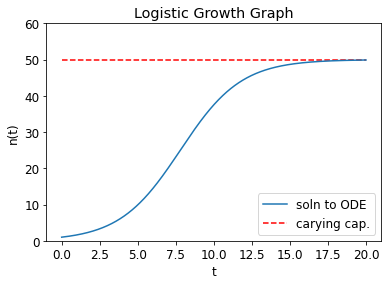

In [13]:
# Step size
h = .01
# Carrying Capacity K
K = 50
# Growth rate
rc = .5
# Initial Condition 
n0 = 1
# Time to "integrate" forward
t_final = 20
# This line calls ode_solve. Should be fine as is!
t,n = ode_solve(0,n0,t_final)
# calling plot function 
plot(t,n)